<a href="https://colab.research.google.com/github/avach0/varma-with-auto-arima/blob/main/VARMA_With_Auto_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup
<font color='red'>Note:</font> Due to technical difficulties the older verion of the notebook was removed. Here is the updated version.

###Installing dependencies and prerequisites

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 41.9 MB/s eta 0:00:00


### Importing dependencies and prerequisites

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from timeit import default_timer as timer
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

### Connecting to the drive

In [ ]:
from google.colab import drive
drive.mount("/content/gDrive")

Mounted at /content/gDrive


## Reading the data

In [ ]:
path="/content/gDrive/MyDrive/Datasets/Download Data - INDEX_US_DOW JONES GLOBAL_DJIA_2019.csv"
data=pd.read_csv(path)
data[:5]

,Date,Open,High,Low,Close
0,12/31/2019,"28,414.64","28,547.35","28,376.49","28,538.44"
1,12/30/2019,"28,654.76","28,664.69","28,428.98","28,462.14"
2,12/27/2019,"28,675.34","28,701.66","28,608.98","28,645.26"
3,12/26/2019,"28,539.46","28,624.10","28,535.15","28,621.39"
4,12/24/2019,"28,572.57","28,576.80","28,503.21","28,515.45"


## Preprocessing

In [ ]:
df = data.replace(',', '', regex=True)

In [ ]:
df[:5]

,Date,Open,High,Low,Close
0,12/31/2019,28414.64,28547.35,28376.49,28538.44
1,12/30/2019,28654.76,28664.69,28428.98,28462.14
2,12/27/2019,28675.34,28701.66,28608.98,28645.26
3,12/26/2019,28539.46,28624.10,28535.15,28621.39
4,12/24/2019,28572.57,28576.80,28503.21,28515.45


In [ ]:
df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].astype(float)

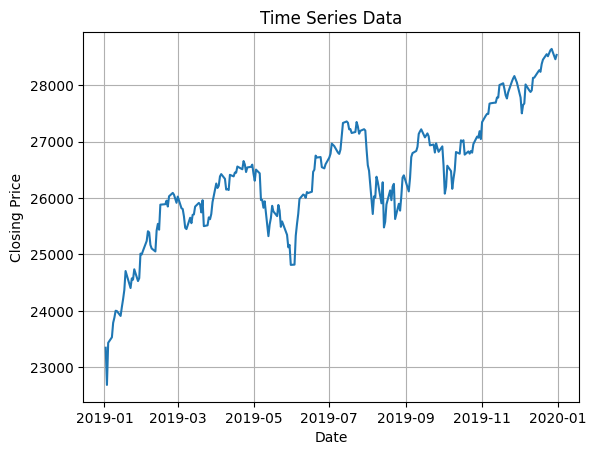

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Create the plot
plt.plot(df['Date'], df['Close'])

# Step 4: Customize the plot (optional)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Time Series Data')
plt.grid(True)

# Step 5: Display the plot
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   Open    252 non-null    float64       
 2   High    252 non-null    float64       
 3   Low     252 non-null    float64       
 4   Close   252 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 10.0 KB


## Checking the stationarity of the data

#####***Open***

In [ ]:
result = adfuller(df['Open'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:Open")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:Open
Test Statistic: -0.174606
p-value: 0.941482
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Failed to Reject H0 - Time Series is Non-Stationary


#####***High***

In [ ]:
result = adfuller(df['High'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:High")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:High
Test Statistic: -0.428596
p-value: 0.905214
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Failed to Reject H0 - Time Series is Non-Stationary


#####***Low***

In [ ]:
result = adfuller(df['Low'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:Low")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:Low
Test Statistic: -0.428847
p-value: 0.905170
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Failed to Reject H0 - Time Series is Non-Stationary


#####***Close***

In [ ]:
result = adfuller(df['Close'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:Close")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:Close
Test Statistic: -0.501972
p-value: 0.891631
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Failed to Reject H0 - Time Series is Non-Stationary


## Mitigating the problem of non-stationary

In [ ]:
df['Close_diff'] = df['Close'].diff()
df['Open_diff'] = df['Open'].diff()
df['Low_diff'] = df['Low'].diff()
df['High_diff'] = df['High'].diff()

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(251, 9)

In [ ]:
data_uti=df[['Date','Open_diff','Close_diff','Low_diff','High_diff']]

In [ ]:
data_uti[:2]

,Date,Open_diff,Close_diff,Low_diff,High_diff
1,2019-12-30,240.12,-76.30,52.49,117.34
2,2019-12-27,20.58,183.12,180.00,36.97


In [ ]:
data_uti.rename(
    columns={"Open_diff": "Open", "Close_diff": "Close","High_diff":"High","Low_diff": "Low"},
    inplace=True,
)

In [ ]:
data_uti=data_uti.reset_index(drop=True)
data_uti[:2]

,Date,Open,Close,Low,High
0,2019-12-30,240.12,-76.30,52.49,117.34
1,2019-12-27,20.58,183.12,180.00,36.97


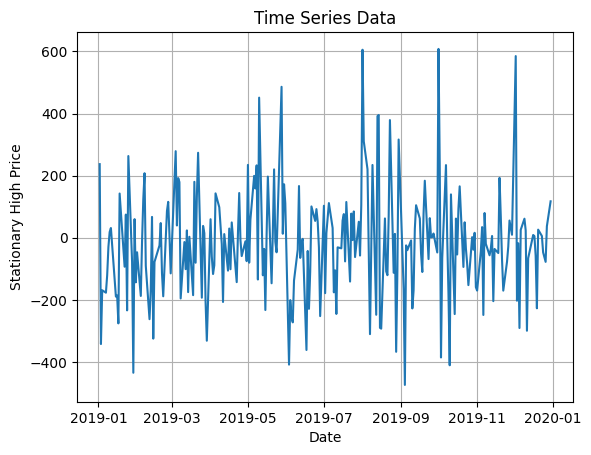

In [ ]:
plt.plot(data_uti['Date'], data_uti['High'])

# Step 4: Customize the plot (optional)
plt.xlabel('Date')
plt.ylabel('Stationary High Price')
plt.title('Time Series Data')
plt.grid(True)

# Step 5: Display the plot
plt.show()

##Dickey-Fuller Test

In [ ]:
result = adfuller(data_uti['Close'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:Close after Differencing")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:Close after Differencing
Test Statistic: -17.166293
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject H0 - Time Series is Stationary


In [ ]:
result = adfuller(data_uti['Open'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:Open after Differencing")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:Open after Differencing
Test Statistic: -15.060297
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject H0 - Time Series is Stationary


In [ ]:
result = adfuller(data_uti['Low'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:Low after Differencing")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:Low after Differencing
Test Statistic: -14.791825
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject H0 - Time Series is Stationary


In [ ]:
result = adfuller(data_uti['High'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:High after Differencing")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:High after Differencing
Test Statistic: -15.087605
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject H0 - Time Series is Stationary


##Johansen Cointegration Test

In [ ]:
result = coint_johansen(data_uti.drop('Date',axis=1), det_order=0, k_ar_diff=1)

In [ ]:
trace_statistic = result.lr1
critical_values = result.cvt[:, 1]  # 1 corresponds to the 5% critical value

In [ ]:
results_df = pd.DataFrame({'Trace Statistic': trace_statistic, 'Critical Value (5%)': critical_values})
results_df.index.name = 'Variable'
results_df.index = data_uti.drop('Date',axis=1).columns

# Print the formatted results
print(results_df)

       Trace Statistic  Critical Value (5%)
Open        847.660587              47.8545
Close       536.780572              29.7961
Low         293.735455              15.4943
High         75.477789               3.8415


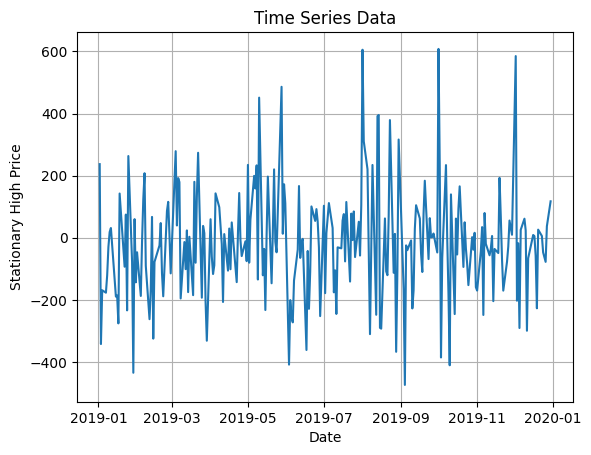

In [ ]:
plt.plot(data_uti['Date'], data_uti['High'])

# Step 4: Customize the plot (optional)
plt.xlabel('Date')
plt.ylabel('Stationary High Price')
plt.title('Time Series Data')
plt.grid(True)

# Step 5: Display the plot
plt.show()

##Splitting data

In [ ]:
split_date = pd.to_datetime('2019-11-01')

# Split the dataset into train and test
train_data = data_uti[data_uti['Date'] <= split_date]
test_data = data_uti[data_uti['Date'] > split_date]

# Optional: Reset the index
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

##Training

#####***Open***

In [ ]:
target_variable_open = 'Open'

# Extract the time series data for the target variable
ts_open = train_data[target_variable_open]

# Apply auto_arima to find the best ARIMA model
stepwise_model_open = auto_arima(ts_open, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_model_open.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2815.726, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2809.613, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2810.700, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2810.732, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2810.315, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2812.690, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.711 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  212
Model:                        SARIMAX   Log Likelihood               -1402.807
Date:                Fri, 16 Jun 2023   AIC                           2809.613
Time:                        10:13:23   BIC                           2816.327
Sample:                             0   HQIC                          2812.327
          

#####***Close***

In [ ]:
target_variable_close = 'Close'

# Extract the time series data for the target variable
ts_close = train_data[target_variable_close]

# Apply auto_arima to find the best ARIMA model
stepwise_model_close = auto_arima(ts_close, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_model_close.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2878.028, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2876.933, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2877.040, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2877.788, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2878.935, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2878.943, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2880.918, Time=0.41 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2877.226, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.856 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  212
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1435.467
Date:                Fri, 16 Jun 2023   AIC           

#####***High***

In [ ]:
target_variable_high = 'High'

# Extract the time series data for the target variable
ts_high = train_data[target_variable_high]

# Apply auto_arima to find the best ARIMA model
stepwise_model_high = auto_arima(ts_high, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_model_high.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2809.861, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2804.921, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2806.179, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2806.077, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2805.388, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2805.861, Time=0.44 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.033 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  212
Model:                        SARIMAX   Log Likelihood               -1400.460
Date:                Fri, 16 Jun 2023   AIC                           2804.921
Time:                        10:13:27   BIC                           2811.634
Sample:                             0   HQIC                          2807.634
          

####***Low***

In [ ]:
target_variable_low = 'Low'

# Extract the time series data for the target variable
ts_low = train_data[target_variable_low]

# Apply auto_arima to find the best ARIMA model
stepwise_model_low = auto_arima(ts_low, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_model_low.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2859.402, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2857.298, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2858.646, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2858.604, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2857.589, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2855.402, Time=0.54 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2857.398, Time=0.50 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2857.398, Time=0.35 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2859.880, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2860.195, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2855.530, Time=0.20 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.749 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  

##Final Model

In [ ]:
target_variable_high = 'High'
ts_high = train_data[target_variable_high]

best_model_high= auto_arima(ts_high, start_p=0, d=1, start_q=0,
           max_p=0, max_d=2, max_q=1, seasonal=False,
           trace=True, suppress_warnings=True, stepwise=False)

print(best_model_high.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2924.648, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.116 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  212
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1460.324
Date:                Fri, 16 Jun 2023   AIC                           2924.648
Time:                        10:13:30   BIC                           2931.352
Sample:                             0   HQIC                          2927.358
                                - 212                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
interc

## Forecasting

In [ ]:
forecast=best_model_high.predict(n_periods=20, return_conf_int=True)

In [ ]:
forecast

(212    239.01
 213    240.94
 214    242.87
 215    244.80
 216    246.73
 217    248.66
 218    250.59
 219    252.52
 220    254.45
 221    256.38
 222    258.31
 223    260.24
 224    262.17
 225    264.10
 226    266.03
 227    267.96
 228    269.89
 229    271.82
 230    273.75
 231    275.68
 dtype: float64,
 array([[ -241.55142262,   719.57142262],
        [ -438.67648142,   920.55648142],
        [ -589.48680013,  1075.22680013],
        [ -716.32284524,  1205.92284524],
        [ -827.83800834,  1321.29800834],
        [ -928.47027548,  1425.79027548],
        [-1020.85601394,  1522.03601394],
        [-1106.71296284,  1611.75296284],
        [-1187.23426786,  1696.13426786],
        [-1263.28865109,  1776.04865109],
        [-1335.53192755,  1852.15192755],
        [-1404.47360027,  1924.95360027],
        [-1470.51885026,  1994.85885026],
        [-1533.99619674,  2062.19619674],
        [-1595.17638664,  2127.23638664],
        [-1654.28569048,  2190.20569048],
        [-1

In [ ]:
predicted_values = forecast[0]

##Evaluating

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['High'][:20], predicted_values))
print("RMSE:", rmse)

RMSE: 331.23150930278473


## Vizualizing the forecast

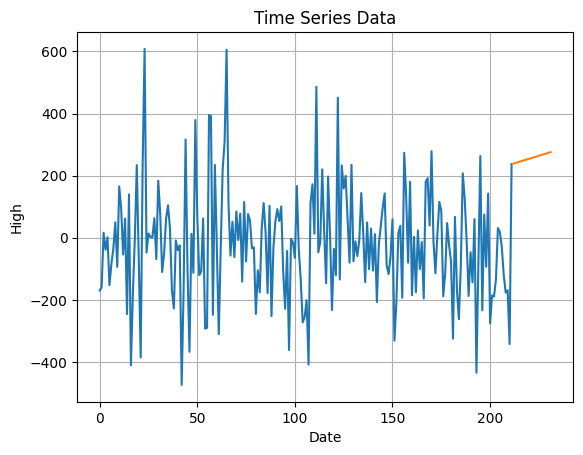

In [ ]:
plt.plot(train_data['High'])
plt.plot(predicted_values)

# Step 4: Customize the plot (optional)
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Time Series Data')
plt.grid(True)

# Step 5: Display the plot
plt.show()